#Semua

## Preliminary Flow

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [331]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/portfolio/Bike Sales.csv')

In [332]:
df.sample(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
4593,2015-12-24,24,December,2015,32,Young Adults (25-34),F,United Kingdom,England,Accessories,Bottles and Cages,Water Bottle - 30 oz.,22,2,5,62,44,106
75221,2013-08-04,4,August,2013,43,Adults (35-64),F,United States,Oregon,Accessories,Tires and Tubes,Patch Kit/8 Patches,8,1,2,6,8,14
5365,2016-03-27,27,March,2016,31,Young Adults (25-34),M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5,2,5,15,10,25
19805,2016-05-24,24,May,2016,35,Adults (35-64),M,United States,Washington,Clothing,Caps,AWC Logo Cap,11,7,9,0,77,77
2547,2013-11-17,17,November,2013,26,Young Adults (25-34),F,Australia,Queensland,Accessories,Bottles and Cages,Road Bottle Cage,15,3,9,68,45,113


##Missing values & Duplicated values

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [334]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [335]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [336]:
df.shape

(113036, 18)

In [337]:
df.duplicated().values.any()

True

In [338]:
df.duplicated().sum()

1000

In [339]:
df = df.drop_duplicates()

In [340]:
df.duplicated().values.any()

False

In [341]:
df['Date'] = pd.to_datetime(df['Date'])

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              112036 non-null  datetime64[ns]
 1   Day               112036 non-null  int64         
 2   Month             112036 non-null  object        
 3   Year              112036 non-null  int64         
 4   Customer_Age      112036 non-null  int64         
 5   Age_Group         112036 non-null  object        
 6   Customer_Gender   112036 non-null  object        
 7   Country           112036 non-null  object        
 8   State             112036 non-null  object        
 9   Product_Category  112036 non-null  object        
 10  Sub_Category      112036 non-null  object        
 11  Product           112036 non-null  object        
 12  Order_Quantity    112036 non-null  int64         
 13  Unit_Cost         112036 non-null  int64         
 14  Unit

##Exploratory Data Analysis (EDA)

###Statistical Summary of columns

In [343]:
cats = ['Date', 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'State',
        'Product_Category', 'Sub_Category', 'Product']
nums = ['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue',]
#nums = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue',]

###Univariate Analysis

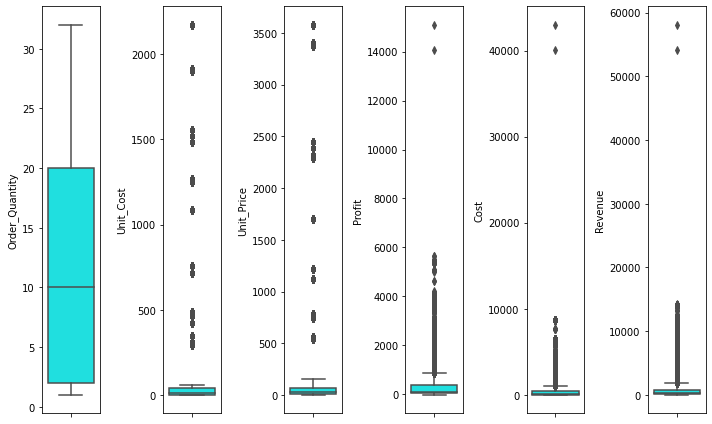

In [344]:
plt.figure(figsize=(10,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()


It can be seen that these data have several outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Annual Transaction')

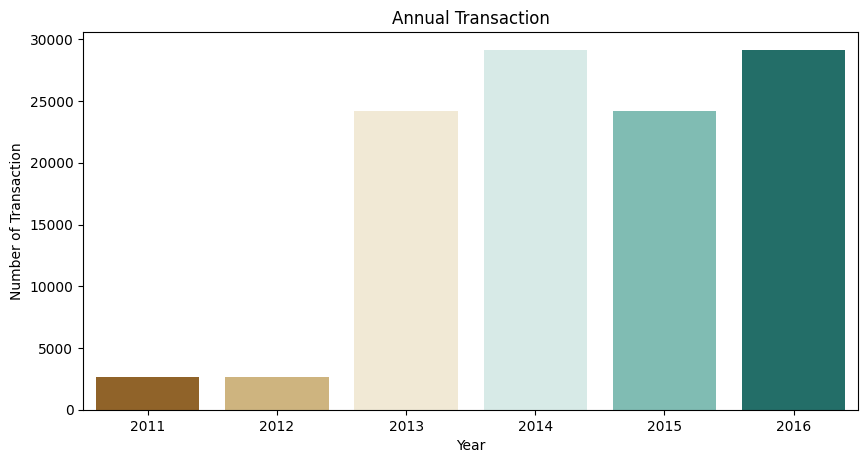

In [345]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(df['Year'],palette='BrBG')
plt.xlabel('Year')
plt.ylabel('Number of Transaction')
plt.title('Annual Transaction')

It can be seen that the number of transactions peaked in 2014 and 2016 but the data looks the same, as in other years such as 2011 and 2012, 2013 and 2015.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Country Transaction')

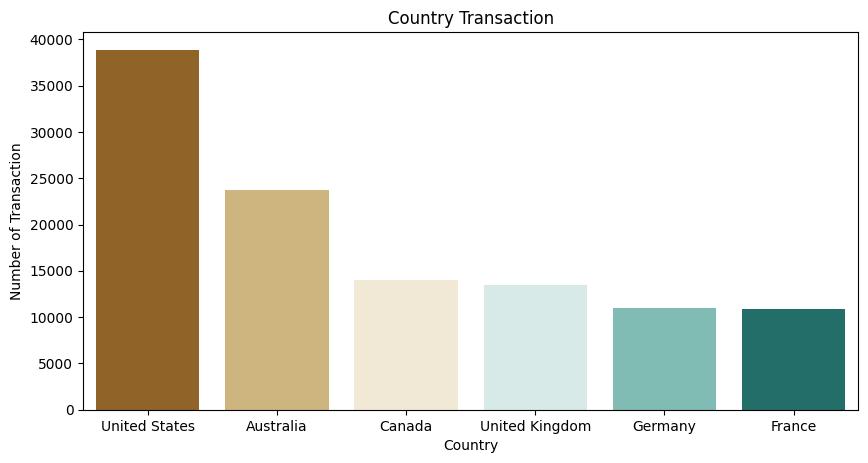

In [346]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(df['Country'],palette='BrBG',order = df['Country'].value_counts().index)
plt.xlabel('Country')
plt.ylabel('Number of Transaction')
plt.title('Country Transaction')

It can be seen that transactions in the United State rank first compared to other countries

###Multivariate analysis

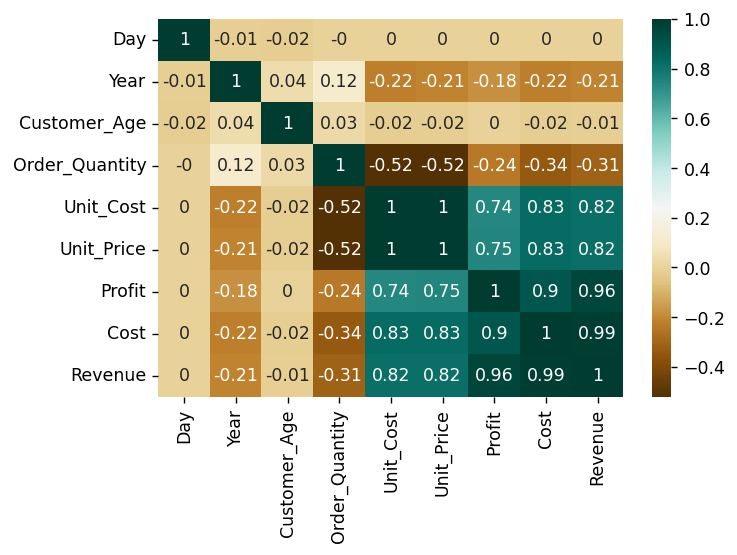

In [347]:
plt.figure(dpi=125)
sns.heatmap(np.round(df.corr(),2),annot=True, cmap='BrBG')
plt.show()

It can be seen that Unit_Cost, Unit_Price, Cost, Revenue and Profit are highly correlated with each other

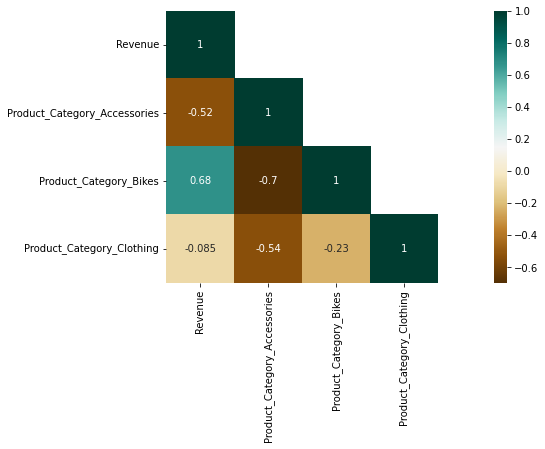

In [348]:
df2 = df[['Product_Category','Revenue']]
df_cat = pd.get_dummies(df2)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True, cmap='BrBG');

It can be seen that the bicycle product category has a high correlation with the company's revenue

<Figure size 720x720 with 0 Axes>

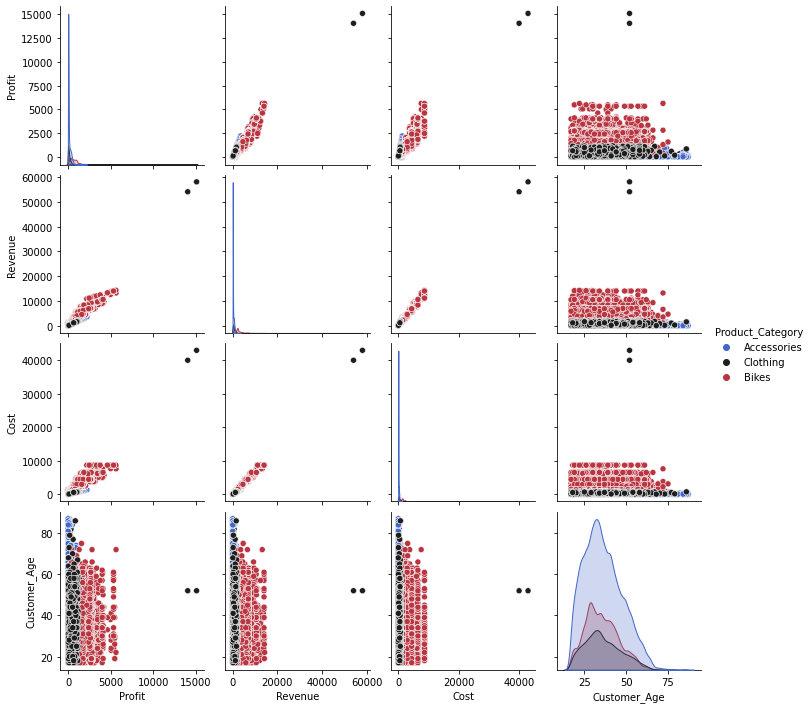

In [349]:
cols_to_plot = ['Product_Category', 'Profit', 'Revenue','Cost', 'Customer_Age']
plt.figure(figsize=(10,10))
sns.pairplot(df[cols_to_plot], hue='Product_Category',palette=('icefire'))
plt.show() 

From this scatterplot it can be seen that:

1. Bikes category provides the most for revenue and profit and cost 
2.   The most transactions are obtained by customers with an age range of 20 to 50 years in the accessories product category



##Machine Learning

In [350]:
df_num = df[['Day', 'Year','Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']]

In [351]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_num.drop(columns='Revenue')
target =df_num[['Revenue']]

feature_Revenue_pretrain, feature_Revenue_test, target_Revenue_pretrain, target_Revenue_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_Revenue_train, feature_Revenue_validation, target_Revenue_train, target_Revenue_validation = train_test_split(feature_Revenue_pretrain, target_Revenue_pretrain, test_size=0.20, random_state=42)

In [352]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_Revenue_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Day,1.000460
2,Year,1.058675
3,Customer_Age,1.003704
4,Order_Quantity,1.469634
5,Unit_Cost,302.060978
6,Unit_Price,298.031728
7,Profit,6.946227
8,Cost,9.212907


There are several features with high VIF scores:
1. `Unit_Cost`
2. `Unit_Price`
3. `Cost`



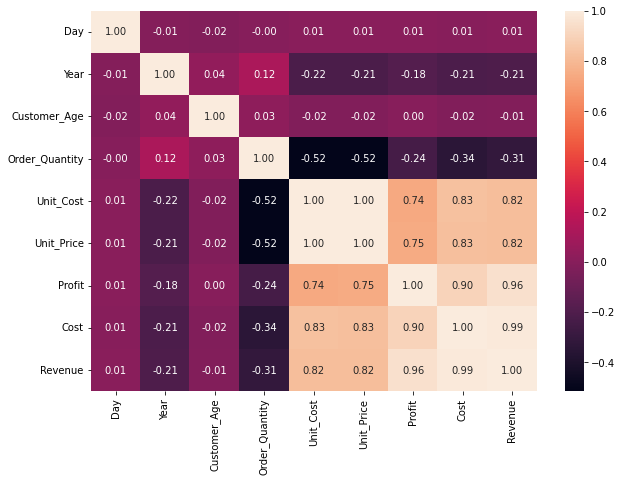

In [353]:
# heatmap correlation
Revenue_train = pd.concat([feature_Revenue_train, target_Revenue_train], axis=1)
corr = Revenue_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [354]:
#Drop Multicollinear Features
feature_Revenue_train = feature_Revenue_train.drop(columns=['Unit_Cost', 'Unit_Price'])
feature_Revenue_validation = feature_Revenue_validation.drop(columns=['Unit_Cost', 'Unit_Price'])
feature_Revenue_test = feature_Revenue_test.drop(columns=['Unit_Cost', 'Unit_Price'])

In [355]:
#Recheck VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_Revenue_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Day,1.000440
2,Year,1.052989
3,Customer_Age,1.003680
4,Order_Quantity,1.169753
5,Profit,5.611757
6,Cost,6.045804


### Ridge regression

In [356]:
from sklearn.linear_model import Ridge

# train the model
X_Revenue_train = feature_Revenue_train.to_numpy()
y_Revenue_train = target_Revenue_train.to_numpy()
y_Revenue_train = y_Revenue_train.reshape(len(y_Revenue_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_Revenue_train, y_Revenue_train)
ridge_reg_pointone.fit(X_Revenue_train, y_Revenue_train)
ridge_reg_one.fit(X_Revenue_train, y_Revenue_train)
ridge_reg_ten.fit(X_Revenue_train, y_Revenue_train)

Ridge(alpha=10, random_state=42)

In [357]:
from sklearn.metrics import mean_squared_error

X_Revenue_validation = feature_Revenue_validation.to_numpy()
y_Revenue_validation = target_Revenue_validation.to_numpy()
y_Revenue_validation = y_Revenue_validation.reshape(len(y_Revenue_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_Revenue_validation)
    rmse = np.sqrt(mean_squared_error(y_Revenue_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.269577565425274e-10
RMSE of Ridge regression model with alpha = 0.1 is 4.2735127783448005e-09
RMSE of Ridge regression model with alpha = 1.0 is 4.274212745570011e-08
RMSE of Ridge regression model with alpha = 10 is 4.2742217659789303e-07


The best lambda is `0.01`

In [358]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_Revenue_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.891500e-08
1,Day,4.362381e-13
2,Year,-1.924230e-11
3,Customer_Age,1.209658e-12
4,Order_Quantity,1.204169e-12
5,Profit,1.000000e+00
6,Cost,1.000000e+00


In [359]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_Revenue_train)

print('R-squared for training data is {}'.format(r2_score(y_Revenue_train, y_predict_train)))

R-squared for training data is 1.0


In [360]:
from sklearn.metrics import r2_score

y_predict_test = ridge_best.predict(X_Revenue_test)

print('R-squared for test data is {}'.format(r2_score(y_Revenue_test, y_predict_test)))

R-squared for test data is 1.0


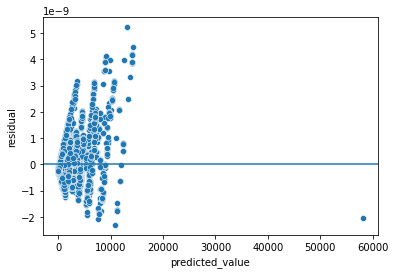

In [361]:
# calculate residuals
residual = y_Revenue_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

 #### Evaluate the best models on the test data

##### Training Error

In [362]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_Revenue_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_Revenue_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_Revenue_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_Revenue_train, y_predict_train)))

RMSE for training data is 4.1520554651387076e-10
MAE for training data is 2.7366876016837903e-10
MAPE for training data is 3.495919480889643e-12


##### Testing Error

In [363]:
# prepare prediction result on test data
X_Revenue_test = feature_Revenue_test.to_numpy()
y_predict_test = ridge_best.predict(X_Revenue_test)

# ground truth target
y_Revenue_test = target_Revenue_test.to_numpy()
y_Revenue_test = y_Revenue_test.reshape(len(y_Revenue_test),)

In [364]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_Revenue_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_Revenue_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_Revenue_test, y_predict_test)))

RMSE for testing data is 4.142910475151136e-10
MAE for testing data is 2.7325380856841204e-10
MAPE for testing data is 3.4043032998579816e-12


###Lasso

In [365]:
from sklearn.linear_model import Lasso

# train the model
X_Revenue_train = feature_Revenue_train.to_numpy()
y_Revenue_train = target_Revenue_train.to_numpy()
y_Revenue_train = y_Revenue_train.reshape(len(y_Revenue_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_Revenue_train, y_Revenue_train)
lasso_reg_pointone.fit(X_Revenue_train, y_Revenue_train)
lasso_reg_one.fit(X_Revenue_train, y_Revenue_train)
lasso_reg_ten.fit(X_Revenue_train, y_Revenue_train)

Lasso(alpha=10, random_state=42)

In [366]:
from sklearn.metrics import mean_squared_error

X_Revenue_validation = feature_Revenue_validation.to_numpy()
y_Revenue_validation = target_Revenue_validation.to_numpy()
y_Revenue_validation = y_Revenue_validation.reshape(len(y_Revenue_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_Revenue_validation)
    rmse = np.sqrt(mean_squared_error(y_Revenue_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 0.018889991436501698
RMSE of Lasso regression model with alpha = 0.1 is 0.03852772943918341
RMSE of Lasso regression model with alpha = 1.0 is 0.07103377180437287
RMSE of Lasso regression model with alpha = 10 is 0.049438360284290724


In [367]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_Revenue_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-0.023509
1,Day,-0.000000
2,Year,-0.000000
3,Customer_Age,-0.000000
4,Order_Quantity,-0.000000
5,Profit,1.000356
6,Cost,0.999834


In [368]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_Revenue_train)

print('R-squared for training data is {}'.format(r2_score(y_Revenue_train, y_predict_train)))

R-squared for training data is 0.9999999971961063


In [369]:
from sklearn.metrics import r2_score

y_predict_test = lasso_best.predict(X_Revenue_test)

print('R-squared for test data is {}'.format(r2_score(y_Revenue_test, y_predict_test)))

R-squared for test data is 0.9999999971384231


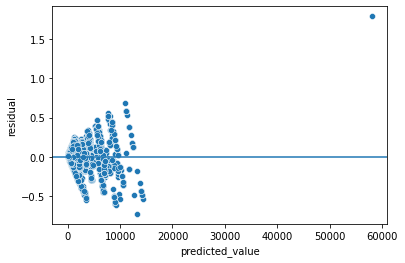

In [370]:
# calculate residuals
residual = y_Revenue_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

#####  Evaluate the best models on the test data

##### Training Error



In [371]:
# prepare prediction result on training data
y_predict_train = lasso_best.predict(X_Revenue_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_Revenue_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_Revenue_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_Revenue_train, y_predict_train)))

RMSE for training data is 0.06954383464432591
MAE for training data is 0.043651913378418984
MAPE for training data is 0.0004011656388708272


##### Testing Error

In [372]:
# prepare prediction result on test data
X_Revenue_test = feature_Revenue_test.to_numpy()
y_predict_test = lasso_best.predict(X_Revenue_test)

# ground truth target
y_Revenue_test = target_Revenue_test.to_numpy()
y_Revenue_test = y_Revenue_test.reshape(len(y_Revenue_test),)

In [373]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_Revenue_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_Revenue_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_Revenue_test, y_predict_test)))

RMSE for testing data is 0.07029651642364355
MAE for testing data is 0.043765253361328624
MAPE for testing data is 0.00039148835338876416


### Conclusion

RMSE
```
Ridge regression
*   Train = 4.1633616001755736
*   Test = 4.155991968059244
Lasso
*   Train = 0.06954383464432591
*   Test = 0.07029651642364355
```
MAE
```
Ridge regression
*   Train = 2.746971919160461
*   Test = 2.744829883039158
Lasso
*   Train = 0.043651913378418984
*   Test = 0.043765253361328624
```
MAPE
```
Ridge regression
*   Train = 3.5483870982896114 = 354 %
*   Test = 3.465504475699027 = 346 %
Lasso
*   Train = 0.0004011656388708272 = 0.040 %
*   Test = 0.00039148835338876416 = 0.039 %
```






The best type of regression to use is lasso regression because the Mean Precentage Absolute Error of the train and test is quite successful (under 30%) and Root Mean Square Error (RMSE), Mean Absolute Error (MAE), Mean Precentage Absolute Error (MAPE) smaller than ridge regression.